# Pandas

In [1]:
import pandas as pd
import numpy as np

## Series

In [4]:
etiquetas = ['a','b','c']
datos = [1,2,3]
pd.Series(data = datos, index=etiquetas)

a    1
b    2
c    3
dtype: int64

In [9]:
array = np.arange(5,8)
etiquetas = ['venta1','venta2','venta3']
pd.Series(array, etiquetas)

venta1    5
venta2    6
venta3    7
dtype: int32

## DataFrames

In [13]:
filas = ['ventas1','ventas2','ventas3']
columnas = ['zonaA','zonaB','zonaC']
datos = [[123,421,256],[123,321,125],[452,125,652]]

In [14]:
dataframe = pd.DataFrame(datos, filas, columnas)
dataframe

,zonaA,zonaB,zonaC
ventas1,123,421,256
ventas2,123,321,125
ventas3,452,125,652


In [15]:
dataframe.loc['ventas1']

zonaA    123
zonaB    421
zonaC    256
Name: ventas1, dtype: int64

### Agregar una columna

In [16]:
dataframe['todaslaszonas'] = dataframe['zonaA'] + dataframe['zonaB'] + dataframe['zonaC']
dataframe

,zonaA,zonaB,zonaC,todaslaszonas
ventas1,123,421,256,800
ventas2,123,321,125,569
ventas3,452,125,652,1229


### borrar una columna
* implace hace que lo borre definitivamente

In [19]:
dataframe.drop('todaslaszonas', axis=1,inplace=True)
dataframe

,zonaA,zonaB,zonaC
ventas1,123,421,256
ventas2,123,321,125
ventas3,452,125,652


### Condiciones

In [20]:
condicion = dataframe > 200

In [21]:
dataframe[condicion]

,zonaA,zonaB,zonaC
ventas1,NaN,421.0,256.0
ventas2,NaN,321.0,NaN
ventas3,452.0,NaN,652.0


In [22]:
condicion = dataframe['zonaA'] > 200
dataframe[condicion]

,zonaA,zonaB,zonaC
ventas3,452,125,652


### Modificando las filas

In [24]:
n_col = 'dia1 dia2 dia3'.split()
n_col

['dia1', 'dia2', 'dia3']

In [25]:
dataframe['dias'] = n_col
dataframe

,zonaA,zonaB,zonaC,dias
ventas1,123,421,256,dia1
ventas2,123,321,125,dia2
ventas3,452,125,652,dia3


In [26]:
dataframe.set_index('dias')

,zonaA,zonaB,zonaC
dias,,,
dia1,123,421,256
dia2,123,321,125
dia3,452,125,652


In [27]:
dataframe

,zonaA,zonaB,zonaC,dias
ventas1,123,421,256,dia1
ventas2,123,321,125,dia2
ventas3,452,125,652,dia3


### Tratando los valores nulos

In [28]:
diccionario = {'A':[4,5,np.nan], 'B':[8,59,7], 'C':[np.nan,2,np.nan]}
dataframe = pd.DataFrame(diccionario)
dataframe

,A,B,C
0,4.0,8,NaN
1,5.0,59,2.0
2,NaN,7,NaN


In [29]:
dataframe['A']

0    4.0
1    5.0
2    NaN
Name: A, dtype: float64

In [30]:
# Eliminar filas
dataframe.dropna()

,A,B,C
1,5.0,59,2.0


In [31]:
# Eliminar columnas
dataframe.dropna(axis=1)

,B
0,8
1,59
2,7


In [32]:
# rellenando con un valor
dataframe.fillna(value=100)

,A,B,C
0,4.0,8,100.0
1,5.0,59,2.0
2,100.0,7,100.0


In [34]:
# rellenando con la media
valor_medio = dataframe.mean()
valor_medio

A     4.500000
B    24.666667
C     2.000000
dtype: float64

In [35]:
dataframe.fillna(value=valor_medio)

,A,B,C
0,4.0,8,2.0
1,5.0,59,2.0
2,4.5,7,2.0


### Agrupando

In [36]:
diccionario = {
    'dias': ['dia1','dia1','dia2','dia2','dia3'],
    'vendedores': ['Antonio', 'Maria', 'Jose', 'Marta', 'Juan'],
    'ventas': [100,400,200,500,300]
}

In [37]:
dataframe = pd.DataFrame(diccionario)
dataframe

,dias,vendedores,ventas
0,dia1,Antonio,100
1,dia1,Maria,400
2,dia2,Jose,200
3,dia2,Marta,500
4,dia3,Juan,300


In [38]:
dataframe.groupby('dias').mean()

,ventas
dias,
dia1,250
dia2,350
dia3,300


In [39]:
dataframe.groupby('dias').describe()

ventas                                                      
      count   mean         std    min    25%    50%    75%    max
dias                                                             
dia1    2.0  250.0  212.132034  100.0  175.0  250.0  325.0  400.0
dia2    2.0  350.0  212.132034  200.0  275.0  350.0  425.0  500.0
dia3    1.0  300.0         NaN  300.0  300.0  300.0  300.0  300.0

### Combinar dataframes

In [53]:
diccionario1 = {'A':[1,2,3], 'B': [4,5,6], 'C': [7,8,9]}

In [54]:
dataframe1 = pd.DataFrame(diccionario1)
dataframe1

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [58]:
diccionario2 = {
    'A':[11,12,13],
    'B': [14,15,16],
    'C': [17,18,9]
}

In [59]:
dataframe2 = pd.DataFrame(diccionario2)
dataframe2

,A,B,C
0,11,14,17
1,12,15,18
2,13,16,9


In [60]:
# concadenar en vetical
pd.concat([dataframe1, dataframe2])

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
0,11,14,17
1,12,15,18
2,13,16,9


In [61]:
# concadenar en horizontal
pd.concat([dataframe1, dataframe2], axis=1)

,A,B,C,A,B,C
0,1,4,7,11,14,17
1,2,5,8,12,15,18
2,3,6,9,13,16,9


### Merge de dataframes

In [65]:
diccionario3 = {'A':[1,2,3], 'B': [4,5,6], 'Clave': ['C1','C2','C3']}
dataframe3 = pd.DataFrame(diccionario3)
dataframe3

,A,B,Clave
0,1,4,C1
1,2,5,C2
2,3,6,C3


In [66]:
diccionario4 = {'C':[1,2,3], 'D': [4,5,6], 'Clave': ['C1','C2','C3']}
dataframe4 = pd.DataFrame(diccionario4)
dataframe4

,C,D,Clave
0,1,4,C1
1,2,5,C2
2,3,6,C3


In [67]:
pd.merge(dataframe3, dataframe4, on='Clave')

,A,B,Clave,C,D
0,1,4,C1,1,4
1,2,5,C2,2,5
2,3,6,C3,3,6


### join dataframes

In [68]:
diccionario1 = {'A':[1,2,3], 'B': [4,5,6]}
dataframe1 = pd.DataFrame(diccionario1, index=['i1','i2','i3'])
dataframe1

,A,B
i1,1,4
i2,2,5
i3,3,6


In [70]:
diccionario2 = {'C':[11,12,13], 'D': [14,15,16]}
dataframe2 = pd.DataFrame(diccionario2, index=['i1','i2','i3'])
dataframe2

,C,D
i1,11,14
i2,12,15
i3,13,16


In [71]:
dataframe1.join(dataframe2)

,A,B,C,D
i1,1,4,11,14
i2,2,5,12,15
i3,3,6,13,16


### Operaciones con los dataframe

In [72]:
diccionario = {'A':[1,2,3,4], 'B': [5,6,7,8]}
dataframe = pd.DataFrame(diccionario, index=['i1','i2','i3','i4'])
dataframe

,A,B
i1,1,5
i2,2,6
i3,3,7
i4,4,8


In [74]:
dataframe['A'].unique()

array([1, 2, 3, 4], dtype=int64)

In [75]:
dataframe['A'].nunique()

4

In [76]:
dataframe['A'].value_counts()

4    1
3    1
2    1
1    1
Name: A, dtype: int64

In [77]:
def multiplicar(x):
    return x*2

In [78]:
dataframe['A'].apply(multiplicar)

i1    2
i2    4
i3    6
i4    8
Name: A, dtype: int64

In [79]:
dataframe['A'].apply(lambda x: x*2)

i1    2
i2    4
i3    6
i4    8
Name: A, dtype: int64

## Exportar ficheros tipo excel

In [80]:
pwd

'C:\\xampp\\htdocs\\html\\python\\Investigacion\\machine_learning\\readit_media'

In [81]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 9CBF-40AA

 Directorio de C:\xampp\htdocs\html\python\Investigacion\machine_learning\readit_media

18/01/2021  12:07    <DIR>          .
18/01/2021  12:07    <DIR>          ..
25/11/2020  16:52    <DIR>          .ipynb_checkpoints
22/11/2020  12:43             8,211 Ejercicios.ipynb
22/11/2020  12:15             4,791 Filtros y Cadenas.ipynb
22/11/2020  12:04             1,816 Funci¢n Lambda.ipynb
25/11/2020  16:37            19,402 Numpy.ipynb
18/01/2021  12:07            59,520 Pandas.ipynb
               5 archivos         93,740 bytes
               3 dirs  490,456,674,304 bytes libres


In [83]:
dataframe = pd.read_excel('Libro1.xlsx')
dataframe

,0,1,2,3
0,4,5,6,7
1,8,9,10,11
2,12,13,14,15


In [84]:
# buscar hoja especifica
dataframe = pd.read_excel('Libro1.xlsx', sheet_name='Hoja1')
dataframe

,0,1,2,3
0,4,5,6,7
1,8,9,10,11
2,12,13,14,15


## Leer ficheros HTML

In [85]:
url = 'https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_y_territorios_dependientes_por_poblaci%C3%B3n'

In [86]:
datos = pd.read_html(url)

In [87]:
type(datos)

list

In [89]:
dataframe = datos[0]
dataframe

,№,País (o territorio dependiente),Proyecciónexponencialde lapoblaciónal1/1/2021[8]​,% deltotalmun-dial,Cambiomedioanual(%)[9]​,Cambioabsolutoanualpromedio,% delcambiomedioabs.total anual,Añosparaeven-tualdu-pli-ca-ción[10]​,"Censo másreciente,últimaestimaciónoficial,proyecciónde la ONUo reloj depoblaciónnacional",Fecha(d/mm/aaaa)[11]​,Tipo[12]​,Enlace (usualmente oficial) deesta última cifra de población.
0,1,China[13]​,1 406 828 000,1808,048,6 778 000,690,144,1 412 558 000,18/01/2021,R,data.stats.gov.cn
1,2,India,1 380 602 000,1774,134,18 531 000,1886,52,1 379 788 000,18/01/2021,R,www.indiastat.com
2,3,Estados Unidos,332 977 000,428,071,2 348 000,239,99,330 838 000,18/01/2021,R,www.census.gov
3,4,Indonesia,272 839 000,351,130,3 554 000,362,54,271 066 400,2020,A,www.bps.go.id
4,5,Pakistán,227 351 000,292,240,5 451 000,555,29,207 776 954,15/03/2017,P,www.citypopulation.de
...,...,...,...,...,...,...,...,...,...,...,...,...
241,242,Islas Cocos (Australia),500,000,-032,0,000,-,538,30/06/2018,E,www.citypopulation.de
242,243,Islas Ultramarinas Menores de los Estados Unidos,100,000,-496,0,000,-,190,1/04/2010,C,www.statoids.com
243,244,Islas Pitcairn (RU),50,000,-025,0,000,-,50,2020,E,sdd.spc.int
244,NaN,Mundo,7 783 232 000,10000,126,98 264 000,10000,56,7 837 005 000,18/01/2021,R,www.worldometers.info


## Leer SQL

In [91]:
from sqlalchemy import create_engine

In [94]:
diccionario = {'A':[1,2,3], 'B': [4,5,6,]}
dataframe = pd.DataFrame(diccionario)
dataframe

,A,B
0,1,4
1,2,5
2,3,6


In [95]:
engine = create_engine('sqlite:///:memory:')

In [96]:
dataframe.to_sql('tabla', engine, index=False)

In [98]:
datos_leidos_db = pd.read_sql('tabla',con=engine)
datos_leidos_db

,A,B
0,1,4
1,2,5
2,3,6


## Crear graficos

In [101]:
dataframe = pd.DataFrame(np.random.randint(200, size=(50,4)), columns=['a','b','c','d'])
dataframe

,a,b,c,d
0,138,62,144,68
1,144,62,121,63
2,110,57,164,183
3,77,164,163,132
4,186,132,52,161
5,147,93,79,24
6,92,185,163,1
7,160,81,179,157
8,78,35,165,152
9,155,59,32,27


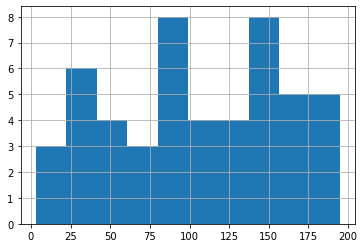

In [105]:
dataframe['a'].hist()

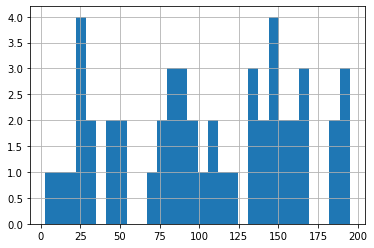

In [106]:
dataframe['a'].hist(bins=30)

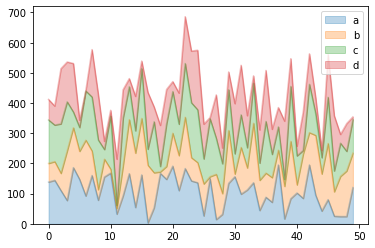

In [108]:
dataframe.plot.area(alpha=.3)

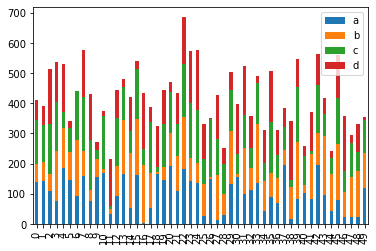

In [111]:
dataframe.plot.bar(stacked=True)

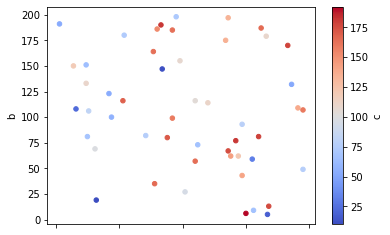

In [113]:
dataframe.plot.scatter(x='a',y='b',c='c', cmap='coolwarm')

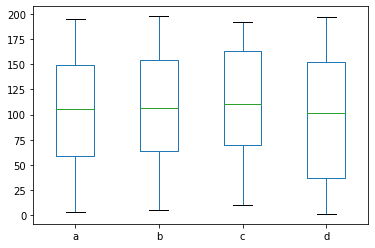

In [114]:
dataframe.plot.box()

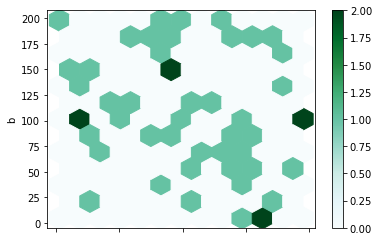

In [115]:
dataframe.plot.hexbin(x='a',y='b',gridsize=12)

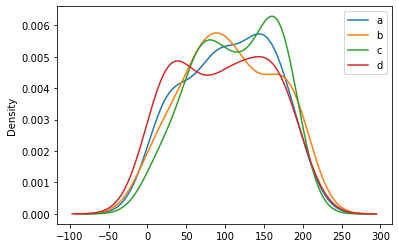

In [116]:
dataframe.plot.kde()

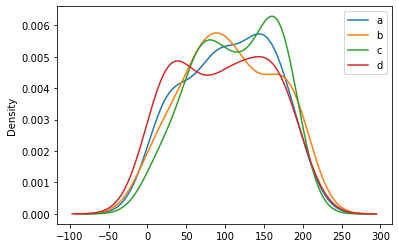

In [117]:
dataframe.plot.density()